# Plotting HF Radar Data in Python

In [171]:
import numpy as np
from netCDF4 import Dataset
from netCDF4 import num2date, date2num
import matplotlib.pyplot as plt
import datetime

In [3]:
# Load the HF radar data in netCDF format, downloaded from AODN
hfr_data = Dataset('output.nc')

See http://oceancurrent.imos.org.au/ for the maps to compare during March 2018

In [7]:
# Take a look at the variables
print(hfr_data.variables.keys())

odict_keys(['TIME', 'LATITUDE', 'LONGITUDE', 'GDOP', 'UCUR', 'VCUR', 'UCUR_sd', 'VCUR_sd', 'NOBS1', 'NOBS2', 'UCUR_quality_control', 'VCUR_quality_control'])


In [9]:
# Look at the time variable format (datenum, or Matplotlib dates)
hfr_data.variables['TIME'][0:10]

array([24909.97916667, 24910.02083333, 24910.0625    , 24910.10416667,
       24910.14583333, 24910.1875    , 24910.22916667, 24910.27083333,
       24910.3125    , 24910.35416667])

In [69]:
# Get time units, calendar used, and convert from num to date
units = hfr_data.variables['TIME'].units
calendar = hfr_data.variables['TIME'].calendar

t = num2date(hfr_data.variables['TIME'][:], units=units, calendar=calendar)
print(t[0]), print(t[-1])

2018-03-14 23:30:00
2018-03-31 23:30:00


(None, None)

In [135]:
# Assign variable names for U, V, lon, lat, and create Speed
u = hfr_data.variables['UCUR'][:,:,:]
v = hfr_data.variables['VCUR'][:,:,:]
lon = hfr_data.variables['LONGITUDE'][:]
lat = hfr_data.variables['LATITUDE'][:]
s = (u**2 + v**2)**0.5

In [56]:
# Take a look at the shape of some of these variables to check they match
np.shape(lat), np.shape(lon), np.shape(t), np.shape(u)

((167,), (114,), (409,), (409, 167, 114))

In [ ]:
# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
# timeIndex = 1
# up = u[timeIndex,:,:]
# vp = v[timeIndex,:,:]
# sp = s[timeIndex,:,:]
# units = hfr_data.variables['UCUR'].units

# figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
# pcolor(lat,lon,sp)
# cbar = colorbar()
# cbar.ax.set_ylabel('Current speed in ' + units)

#title(hfr_data.title + '\n' + num2date(t[timeIndex], t.units, t.calendar).strftime('%d/%m/%Y'))
#xlabel(lon.long_name + ' in ' + LON.units)
#ylabel(lat.long_name + ' in ' + LAT.units)

#plot velocity field
# Q = quiver(lat[:], lon[:], up, vp, units='width')
# show()

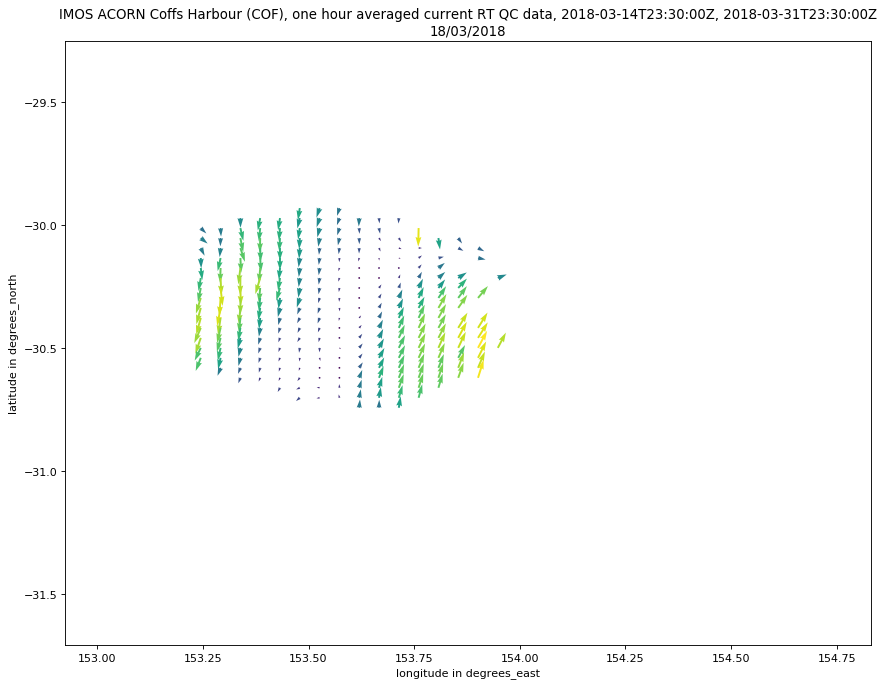

In [288]:
# Get full info on LAT/LON/TIME - i.e. their units etc. as well as data
LAT = hfr_data.variables['LATITUDE']
LON = hfr_data.variables['LONGITUDE']
TIME = hfr_data.variables['TIME']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 80
speedData = s[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
uData = hfr_data.variables['UCUR'][timeIndex,:,:]
vData = hfr_data.variables['VCUR'][timeIndex,:,:]
units = hfr_data.variables['UCUR'].units

# Set Up Figure and Title etc.
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
title(hfr_data.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

# Plot velocity field
Q = plt.quiver(lonData[::3], latData[::3], uData[::3,::3], vData[::3,::3], speedData[::3,::3], units='width')
show()

In [ ]:
# Loop through the plotting
for timeIndex in range(0,len(TIME[:]),10):
    # Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
    speedData = s[timeIndex,:,:]
    latData = LAT[:]
    lonData = LON[:]

    # sea water U and V components
    uData = hfr_data.variables['UCUR'][timeIndex,:,:]
    vData = hfr_data.variables['VCUR'][timeIndex,:,:]
    units = hfr_data.variables['UCUR'].units

    title(num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y %H:%M'))
    xlabel(LON.long_name + ' in ' + LON.units)
    ylabel(LAT.long_name + ' in ' + LAT.units)

    #plot velocity field
    Q = plt.quiver(lonData[::3], latData[::3], uData[::3,::3], vData[::3,::3], speedData[::3,::3], units='width')
    show()
#     plt.pause(1)

In [194]:
# Playing with indexing
# t1 = np.asarray(date2num(datetime.datetime(2018, 3, 17, 0, 0, 0),'days since 1950-01-01 00:00:00 UTC','gregorian'))
# t2 = np.asarray(date2num(datetime.datetime(2018, 3, 19, 0, 0, 0),'days since 1950-01-01 00:00:00 UTC','gregorian'))

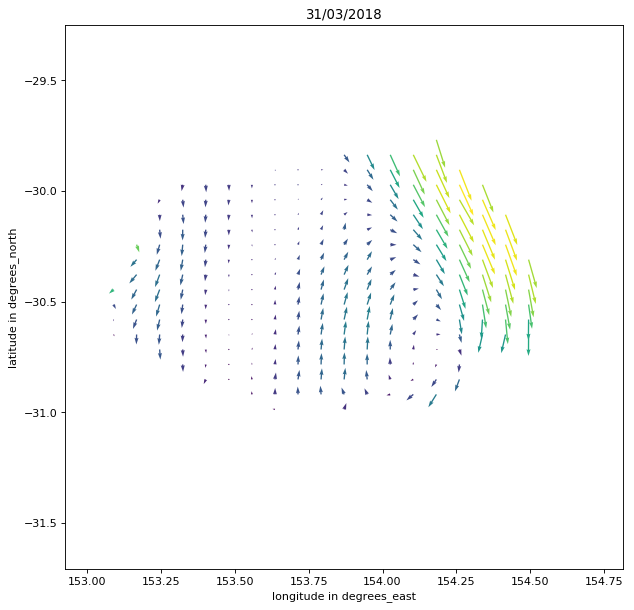

In [232]:
# Choose an interval over which to take a mean
ti = np.logical_and(t>datetime.datetime(2018, 3, 16, 0, 0, 0),t<datetime.datetime(2018, 3, 20, 12, 0, 0))

# Take mean over interval
um = np.mean(u[ti,:,:],axis=0)
vm = np.mean(v[ti,:,:],axis=0)
sm = np.mean(s[ti,:,:],axis=0)

# Prepare figure and axes labels
figure1 = figure(figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
title(num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

# Plot Time Mean velocity field
spac = 5
Q = plt.quiver(lonData[::spac], latData[::spac], um[::spac,::spac], vm[::spac,::spac], sm[::spac,::spac], units='width')
show()

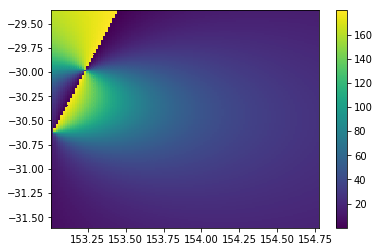

In [222]:
# Take a look at GDOP (geometric dilution of precision)
figure
pcolor(lonData,latData,hfr_data.variables['GDOP'][:]), colorbar()
show()

In [283]:
# Remove data where the GDOP is >140
gdop = hfr_data.variables['GDOP'][:]

umm = um
vmm = vm
umm[gdop>140] = np.ma.masked
vmm[gdop>140] = np.ma.masked
sm[gdop>140] = np.ma.masked


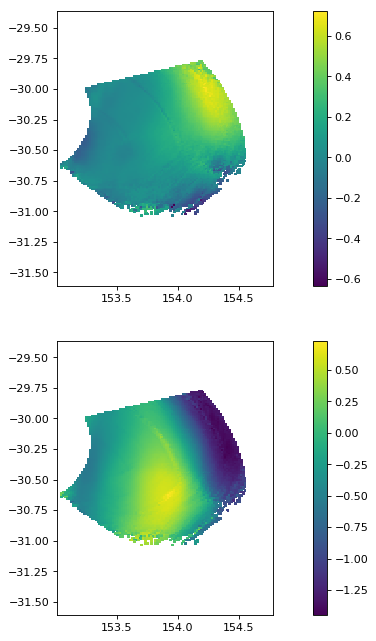

In [282]:
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(211, aspect='equal')

pcolor(lonData,latData,umm), colorbar()

plt.subplot(212, aspect='equal')
pcolor(lonData,latData,vmm), colorbar()

show()

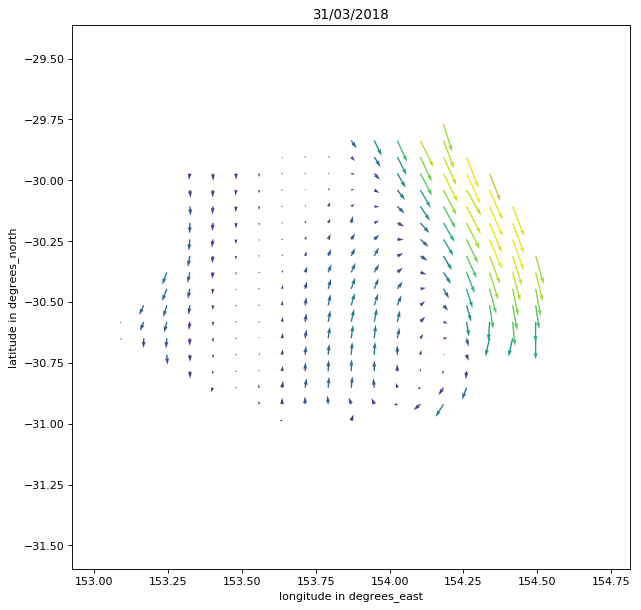

In [287]:
# Prepare figure and axes labels
figure1 = figure(figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
title(num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

# Plot Time Mean velocity field
spac = 5
Q = plt.quiver(lonData[::spac], latData[::spac], umm[::spac,::spac], vmm[::spac,::spac], sm[::spac,::spac], units='width')
show()